### SVMs
#####  SVMs can be used for both classification and regression, but covering classification here  
1. Linear Support Vector Classifiers
    - Hypothesis 
    - Maximum Margin Classifier
    - Mathemtical formulation 
    - Example of using linear classifier  from SVC class and LinearSVC class
2. Multi-class classification using Linear SVM 
   - Linear SVM vs SVC
3. Kernelized SVMs  
   - Intuition of the learning method. 
   - What are kernels , kernel trick. 
   - RBF and Polynomial kernel examples 
   - Importance of gamma in RBF, effect of Feature scaling in SVMs  
   - Pros and Cons of SVMs  

#### 1.1 SVM Hypothesis, Max Margin Classifier 
- In a two dimensional binary classification problem, the idea is to find a straight line or plane, that maximally
separates the two classes 
- Maximal separation is quantified as -
  - If you start drawing parallel lines/planes in either direction of this line/plane, at what maximum distance can you find a data point 
  - This boundary around main line/plane is called maximum margin, and two lines/planes at the boundary of margin are
  called support vectors. 
- Mathematically, hypothesis for a binary classifier is :
  - labels are -1, 1 
  - $y^{(i)} = g(w.x^{(i)} + b)$, where function g directly maps the linear transformation of w and x to a label. 
  - **SVM is not a probabilistic model** 

#### 1.2 Mathematical formulation 
- TBD 
- C is the regularization parameter, like the one in Logistic Regression

In [19]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification, make_blobs
%matplotlib notebook 
plt.style.use('bmh')

#### 1.3.1 Uisng linearSVM
- the learned classifier boundary/plane can be plotted using the weight and intercept vector

<IPython.core.display.Javascript object>


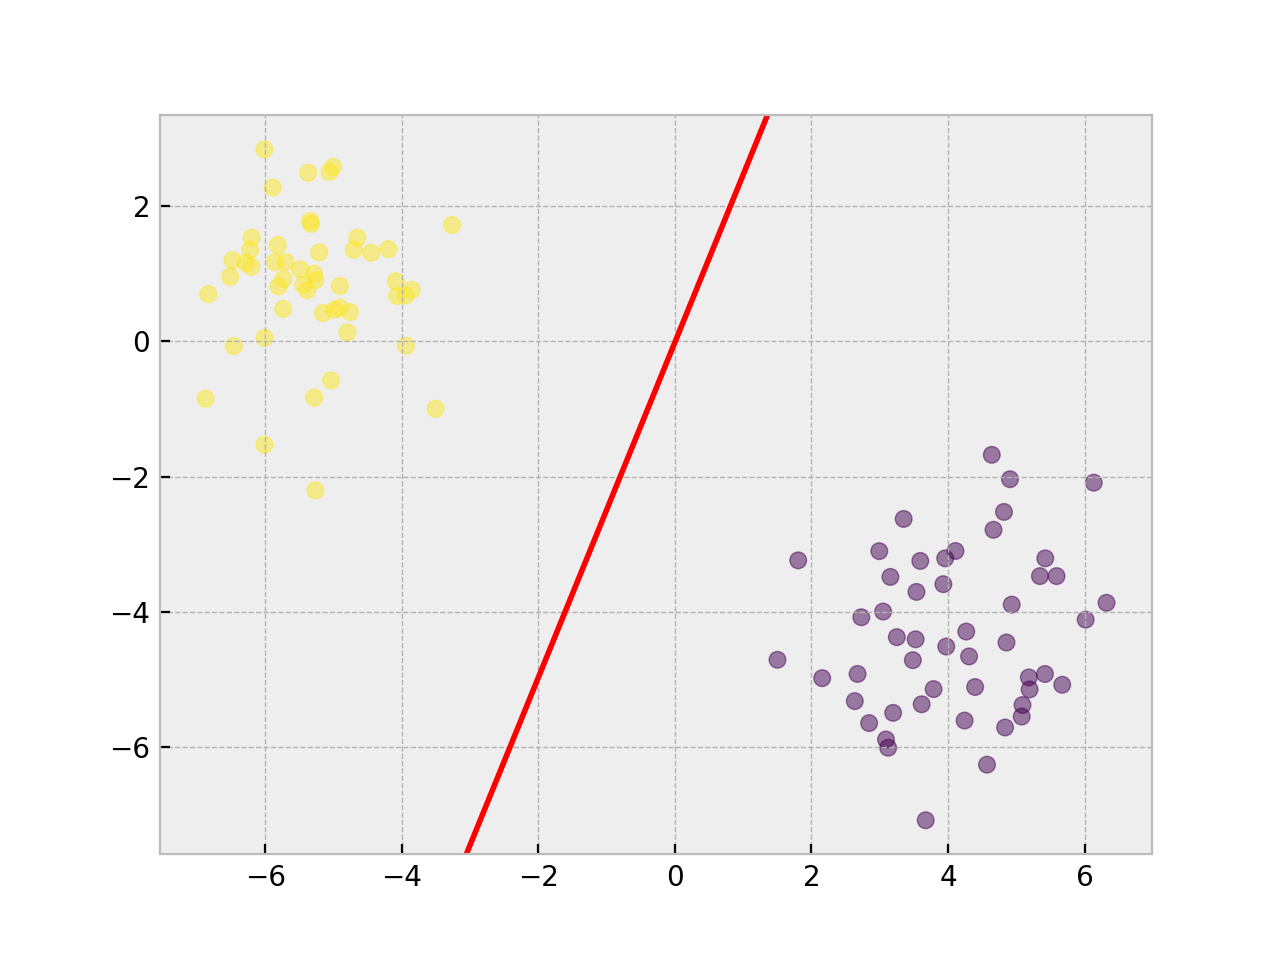

(-7.5801343727838786, 3.3365974579210431)

In [20]:
#data = make_classification(n_features= 2, n_redundant= 0,flip_y = 0)
data = make_blobs(centers= 2,random_state= 123)
X = data[0]
Y = data[1]
plt.figure()
plt.scatter(X[:,0], X[:,1], c = Y, marker = 'o', alpha = 0.5)

clf = LinearSVC(C = 100000)
clf.get_params()
clf.fit(X, Y)

ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x = np.linspace(x_min, x_max,30)
coefs = clf.coef_
intercept = clf.intercept_
y = (-coefs[0][0]*x - intercept)/coefs[0][1] # this evaluating y in ax+by+c=0, knowing x

plt.plot(x,y, c = 'red')
          
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#### 1.3.2 Using linear kernel in SVC, which uses libsvm
Using decision function, which is a plane learned from the data, we can plot decision boundary. Decision function when passed a vector, gives the distance of the vector from the plane, and the sign of distance gives which side the point is from the plane.
- So, based on the meshgrid constructed below, and distance calculation, we can plot a contour plot, which gives 
the line and identifies support vectors

- fitting a linear SVC, finds a plane, the contour plot of the plane is drawn below 
- **support vectors are those points, through which support vectors pass, the dividing plane is 
only dependent on the support vectors and not on other points, hence SVC is less affected by outliers** 
- Regularization 
  - small C, leads to high regularization, i.e the margin width tends to be broader
  - higher C, leads to tighter margin width, so classifier generalizes less well 
  - tuning lets you select best C

<IPython.core.display.Javascript object>


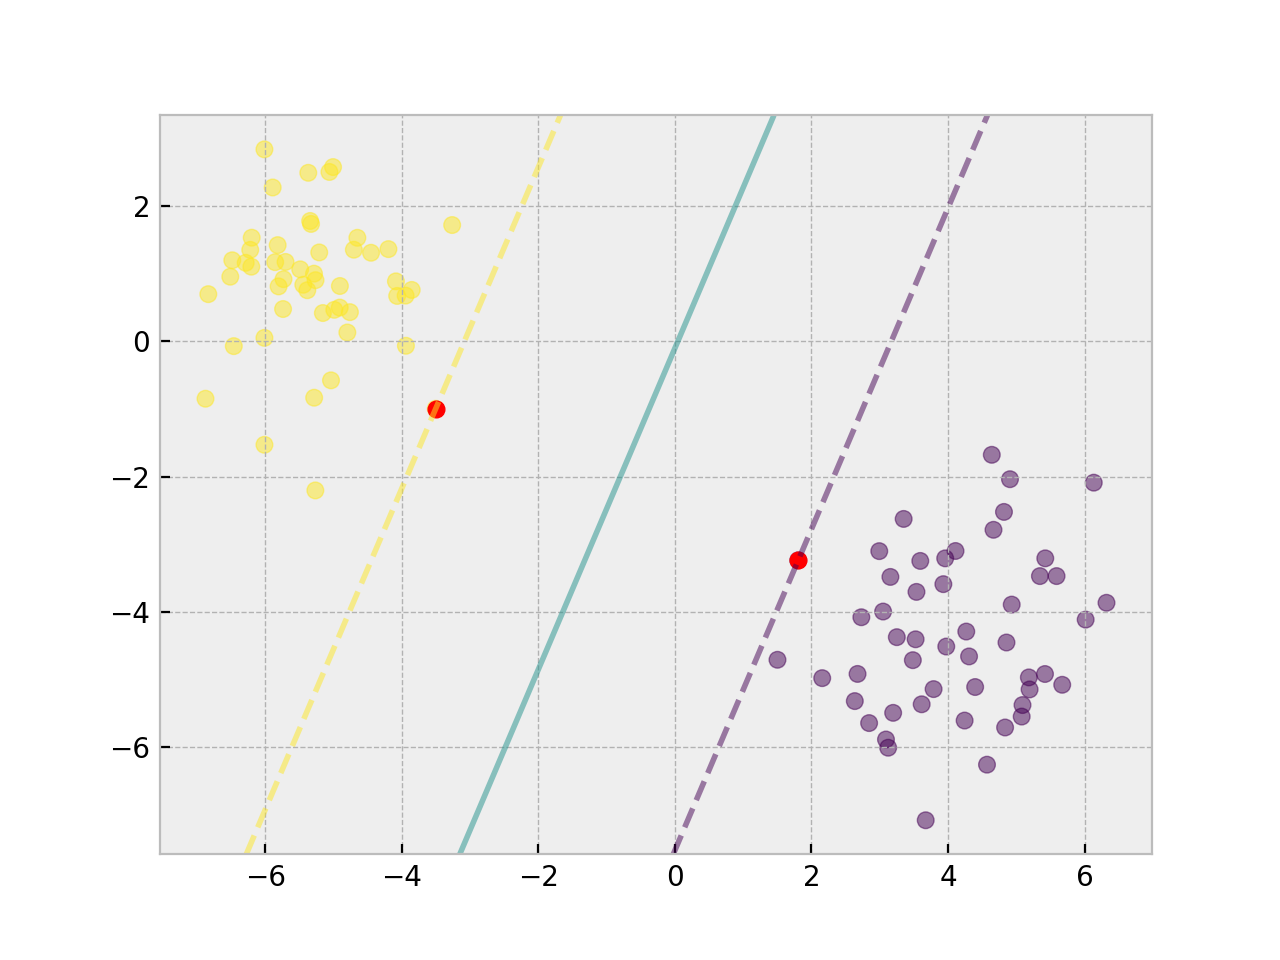

(-7.5801343727838786, 3.3365974579210431)

In [21]:
#data = make_classification(n_features= 2, n_redundant= 0,flip_y = 0)
data = make_blobs(centers= 2,random_state= 123)
X = data[0]
Y = data[1]
plt.figure()
plt.scatter(X[:,0], X[:,1], c = Y, marker = 'o', alpha = 0.5)

clf = SVC(kernel = 'linear', C = 100000)
clf.get_params()
clf.fit(X, Y)

ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max,30), np.linspace(y_min, y_max,30))
z = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))
zz = clf.decision_function(z).reshape(xx.shape)
plt.contour(xx, yy, zz, levels = [-1,0,1], linestyles = ['--','-', '--'], alpha = 0.5)

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c = 'red')
          
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#### 2. Multiclass Classification 
- LinearSVM handles multiclass problems as one vs rest classification problem unlike logistic regression, where both 
 probabilistic functions can be learned. 
 - Another method Crammer-Singer gives a 'consistent' solution, but one vs rest in fast and nearly accurate. 
- SVC class performs one vs one, this building nC2 classifiers 

In [22]:
fruits = pd.read_table('/Users/sumad/Documents/DS/Python/\
UM Spcialization/Machine_Learning/fruit_data_with_colors.txt')

In [23]:
Y= np.array(fruits['fruit_label'], dtype = np.int32)
X = fruits.loc[:,['width', 'height']]

from sklearn.svm import LinearSVC
clf = LinearSVC(C = 1, random_state = 22, max_iter = 10000)
clf.fit(X,Y)
print(clf.intercept_)
print(clf.coef_)

[-1.2167129   0.86871643 -2.00063275  0.38133625]
[[ 0.41042447 -0.26619571]
 [ 0.82449806 -1.153238  ]
 [ 0.29356589 -0.05513569]
 [-1.31581606  1.05013426]]


<IPython.core.display.Javascript object>


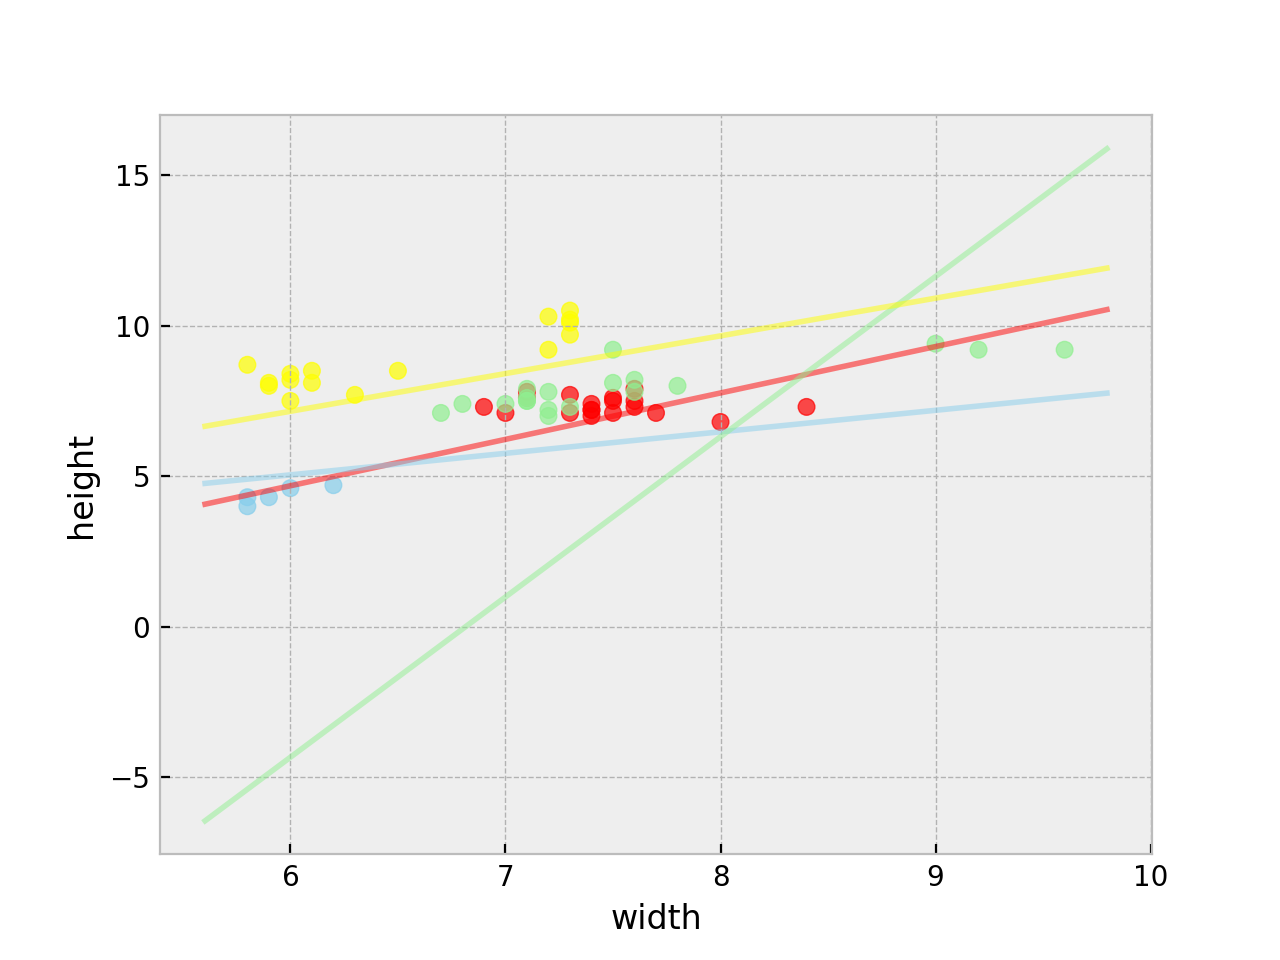

In [24]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'skyblue', 'lightgreen', 'yellow'])
cls = ['red', 'skyblue', 'lightgreen', 'yellow']
plt.figure()
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = Y, cmap = cmap,alpha = 0.7)
plt.xlabel('width')
plt.ylabel('height')

ax = plt.gca()
x_min, x_max = ax.get_xlim()
x = np.linspace(x_min, x_max,30)
coefs = clf.coef_
intercepts = clf.intercept_
for coef_vec, intercept, c in zip(coefs, intercepts, cls):
    y = (-coef_vec[0]*x - intercept)/coef_vec[1] # this evaluating y in ax+by+c=0, knowing x
    plt.plot(x,y, c = c, alpha = 0.5)

#### How Decision on the class labels is made using learned planes
- Using each learned decision function/plane, compute distance from the plane
- sign gives direction, positive means positive class else negative 
- Max of the positive is chosen as final label 

In [25]:
# let us select a bunch of points
test_points = [[8.4,7.3],
                [6, 4.6]]
print(clf.decision_function(test_points))
print(clf.predict(test_points))

[[ 0.28762397 -0.62413729  0.06283018 -3.00553858]
 [ 0.02133366  0.51080997 -0.49286159 -2.68294253]]
[1 2]


#### 3. Kernelized SVMs

#### 3.1 Intuition of learning model:
  - Data that is not separable using linear classifiers, can become linearly separable if projected to a high dimensional space 
  - The high dimensional space can be constructed by using the same features, as in the original data points 
  -  good example is that of linear points described by feature x, which when transformed using $x^2$, can become 
     linearly separable 
  - The linear classifier boundary in the transformed space, corresponds to a non-linear boundary in the original     
    space. In the above example, a plane corresponds to a hyperbola.   

#### 3.2 Kernels and kernel trick
- **The remarkable property of SVMs is that the linear decision boundary in the new feature space, can be learnt 
  in terms of similarity measure bewtween pair of points in this space, which can be simple functions**  
- **The second property is that the the data need not be transformed to a new feature space, the distance in new feature space can be defined in terms of the distance between points in the original space. This is called the kernel trick,and the kernel function defines this similarity between pair of points. The similarity function is called kernel.**  
   - For RBF kernel, the similarity between pair of points in new space is givens as 
      - $K(x, x') = \exp^{-\gamma * (||x-x'||^2)}$
- Different types of kernel functions or similarity measures can be chosen depending on the nature of data, which 
is again a significant property of SVMs, and make them flexible for different data types. 
- This also makes SVM a practical technique to use when feature space is high dimensional and complex. 

#### 3.3 Example of RBF and polynomial kernels

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

fruits = pd.read_table('/Users/sumad/Documents/DS/Python/\
UM Spcialization/Machine_Learning/fruit_data_with_colors.txt')
Y= np.array(fruits['fruit_label'], dtype = np.int32)
X = fruits.loc[:,['width', 'height']]

stages = [('scale', StandardScaler()), ('clf', SVC(kernel = 'rbf', C = 100, gamma = 0.1))]
pipe = Pipeline(stages)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 22, shuffle = True)
pipe.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

<IPython.core.display.Javascript object>


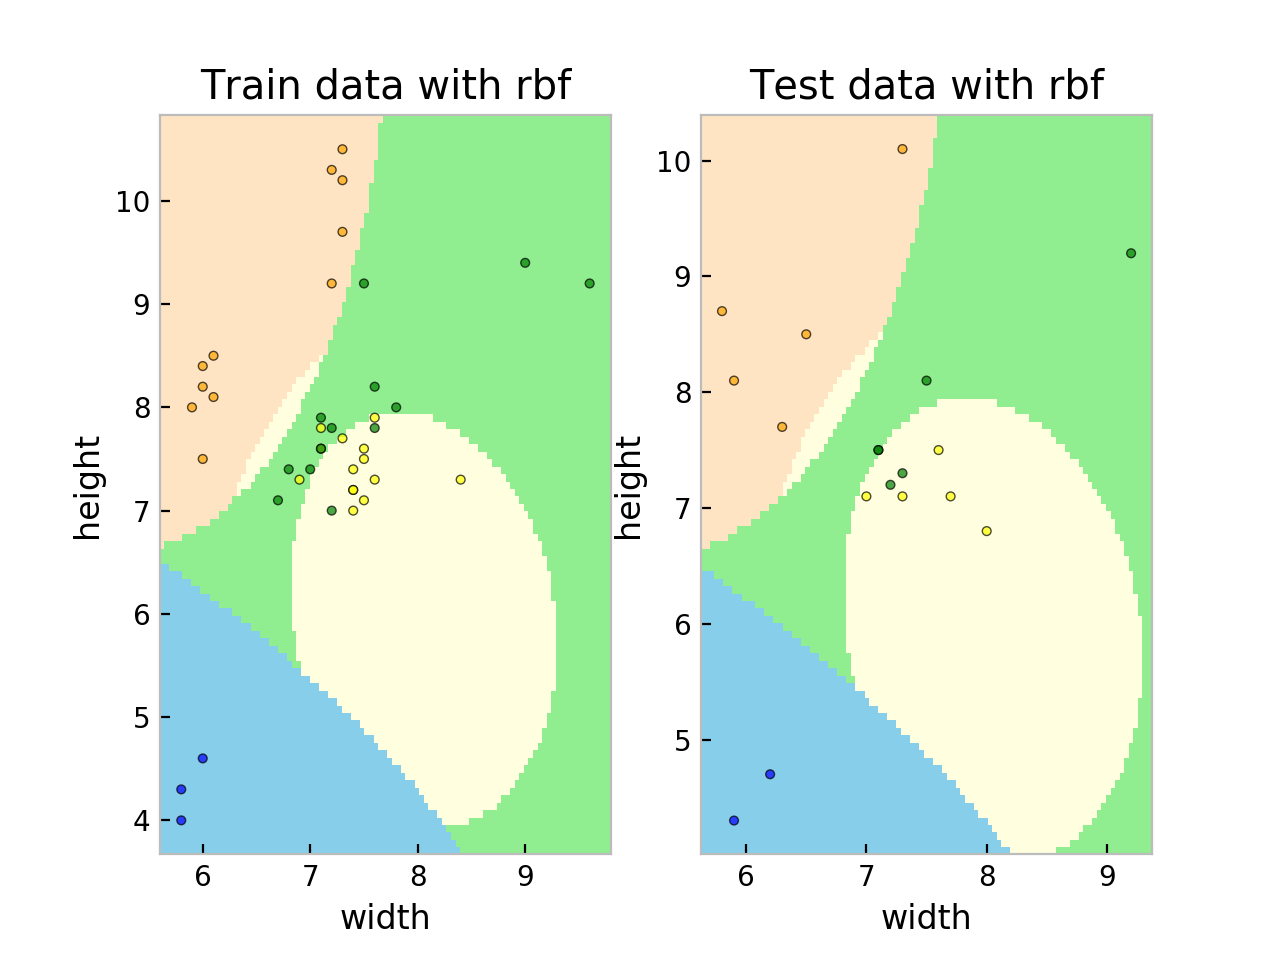

Text(0.5,1,'Train data with rbf')

In [125]:
from matplotlib.colors import ListedColormap
c_points = ListedColormap(['yellow', 'blue', 'green', 'orange'])
c_bound = ListedColormap(['lightyellow', 'skyblue', 'lightgreen', 'bisque'])
cls = ['red', 'skyblue', 'lightgreen', 'yellow']
plt.figure()
plt.subplot(1,2,1)
#ax = plt.gca()
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = Y_train, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)

x_min, x_max = plt.gca().get_xlim()
y_min, y_max = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
x = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
pred = pipe.predict(x).reshape(xx.shape)

plt.pcolormesh(xx,yy,pred,cmap = c_bound)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = Y_train, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)

#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xlabel('width')
plt.ylabel('height')
plt.title('Train data with rbf')


In [126]:
plt.subplot(1,2,2)
#ax = plt.gca()
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = Y_test, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)

x_min, x_max = plt.gca().get_xlim()
y_min, y_max = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
x = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
pred = pipe.predict(x).reshape(xx.shape)

plt.pcolormesh(xx,yy,pred,cmap = c_bound)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = Y_test, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xlabel('width')
plt.ylabel('height')
plt.title('Test data with rbf')

Text(0.5,1,'Test data with rbf')

#### Polynomial Kernel

In [127]:
stages = [('scale', StandardScaler()), ('clf', SVC(kernel = 'poly', C = 100, degree = 3))]
pipe = Pipeline(stages)
pipe.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

<IPython.core.display.Javascript object>


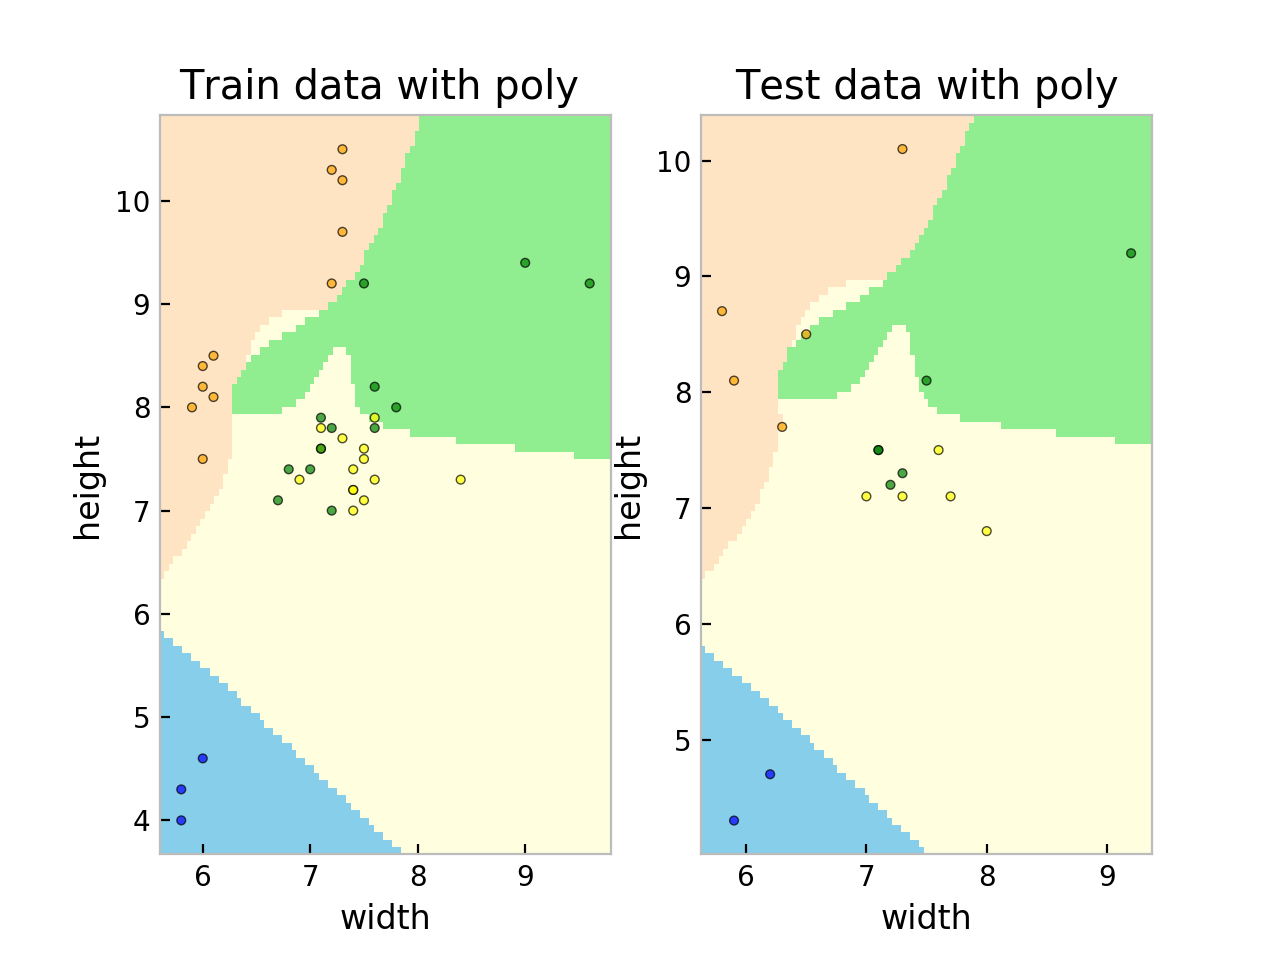

Text(0.5,1,'Train data with poly ')

In [128]:
from matplotlib.colors import ListedColormap
c_points = ListedColormap(['yellow', 'blue', 'green', 'orange'])
c_bound = ListedColormap(['lightyellow', 'skyblue', 'lightgreen', 'bisque'])
cls = ['red', 'skyblue', 'lightgreen', 'yellow']
plt.figure()
plt.subplot(1,2,1)
#ax = plt.gca()
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = Y_train, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)

x_min, x_max = plt.gca().get_xlim()
y_min, y_max = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
x = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
pred = pipe.predict(x).reshape(xx.shape)

plt.pcolormesh(xx,yy,pred,cmap = c_bound)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = Y_train, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)

#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xlabel('width')
plt.ylabel('height')
plt.title('Train data with poly ')

In [129]:
plt.subplot(1,2,2)
#ax = plt.gca()
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = Y_test, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)

x_min, x_max = plt.gca().get_xlim()
y_min, y_max = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
x = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
pred = pipe.predict(x).reshape(xx.shape)

plt.pcolormesh(xx,yy,pred,cmap = c_bound)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = Y_test, 
            cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xlabel('width')
plt.ylabel('height')
plt.title('Test data with poly')

Text(0.5,1,'Test data with poly')

#### 3.4 gamma in RBF, interaction with C, scaling of data
- Gammma : Kernel width parameter, scales the euceldian distance in current space, before exp. acts on the distance to give distance in new space. 
- High values of gamma, can make close points appear further apart and so points have to be really close to be called similar, low values can make farther points appear close 
- High gamma translates to sharper, complex decision boundary in current feature space, lower gamma translates to smoother, less complex boundaries 
- Regularization paramter interacts with gamma, i.e their effect is not indpendent of each other. **SVMs are very sensitive to gamma.**Empirically :
  - Large values of gamma, render C ineffective. 
  - For small values of gamma, C takes effect in influencing decision boundary. 
  - Gamma and C are tuned together 
    - Typical values : Gamma : (10^{-4}, 10) , C : (0.1, 100) 
- **Scaling data is another important aspect,it affecrs accuracy besides training time.Recall kernel is computing distance measure to optimize decision boundary, which affectsaccuracy**    

#### To examine influence of gamma , let us visualize the scaling effect of different values of gamma can do

<IPython.core.display.Javascript object>


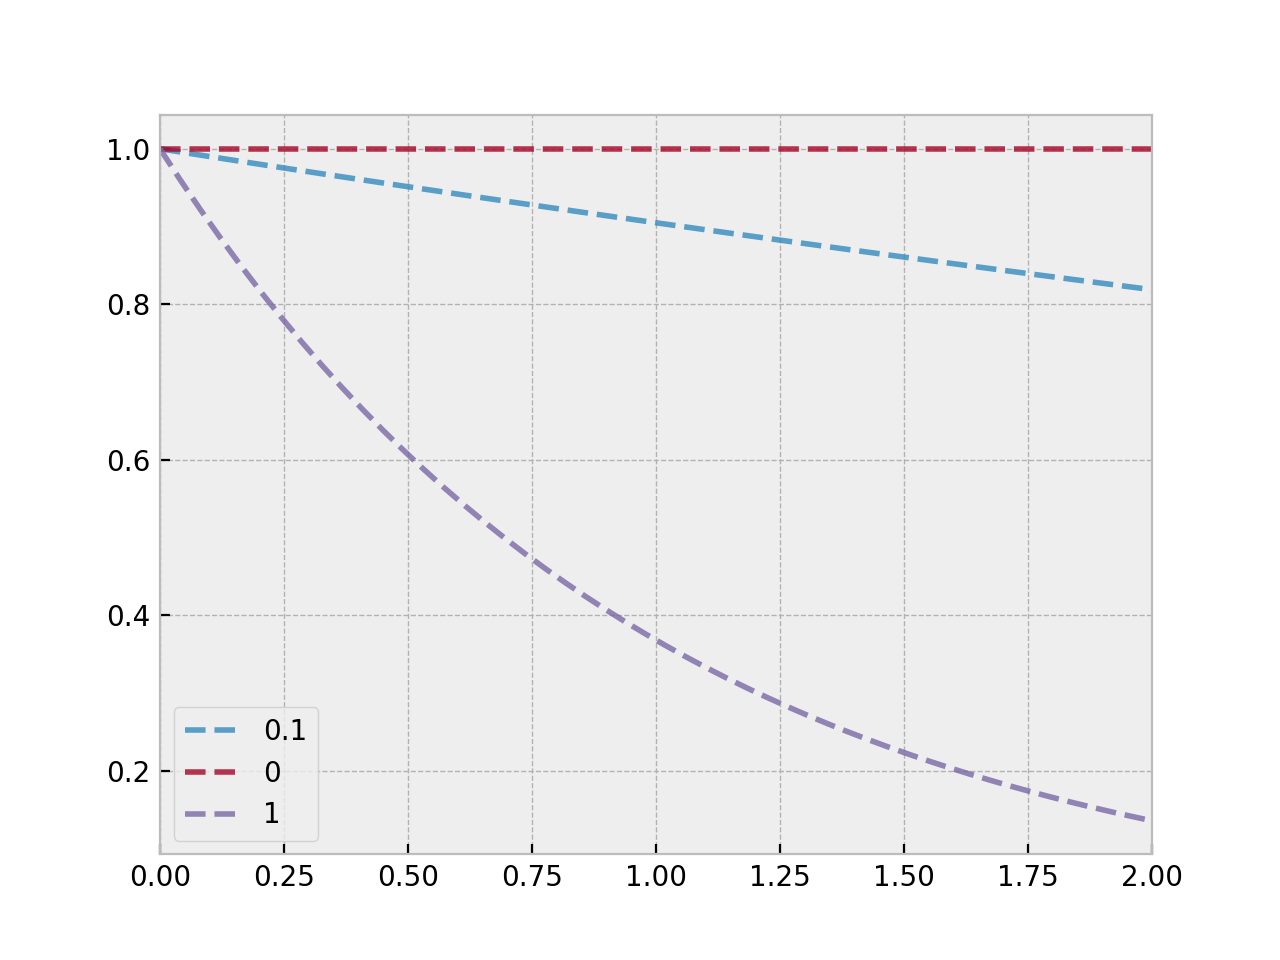

(0, 2)

In [130]:
x = np.linspace(0,2)
gamma = [.1,0,1]
plt.figure()
for g in gamma:
    plt.plot(x, np.exp(-1*g*x), linestyle = '--',label = str(g), alpha = 0.8)
plt.legend()    
ax = plt.gca()
ax.set_xlim(0, 2)

#### Visualize effect of varying gamma and C on learning of decision boundaries

In [179]:
def plot_db(pipe, C, gamma, X, Y):
    
    c_points = ListedColormap(['yellow', 'blue', 'green', 'orange'])
    c_bound = ListedColormap(['lightyellow', 'skyblue', 'lightgreen', 'bisque'])
    plt.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c = Y, 
                cmap = c_points,alpha = 0.7, edgecolor = 'black', s= 10)
    x_min, x_max = plt.gca().get_xlim()
    y_min, y_max = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    x = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
    #print(x.shape)
    pred = pipe.predict(x).reshape(xx.shape)
    #print(pred.shape)
    plt.pcolormesh(xx,yy,pred,cmap = c_bound)
    plt.gca().scatter(X.iloc[:,0].values, X.iloc[:,1].values, c = Y, 
                cmap = c_points,alpha = 0.7, 
             edgecolor = 'black',
             s= 10)
    plt.title('C ={0}, Gamma={1}'.format(C, gamma), fontsize = 'xx-small')

<IPython.core.display.Javascript object>


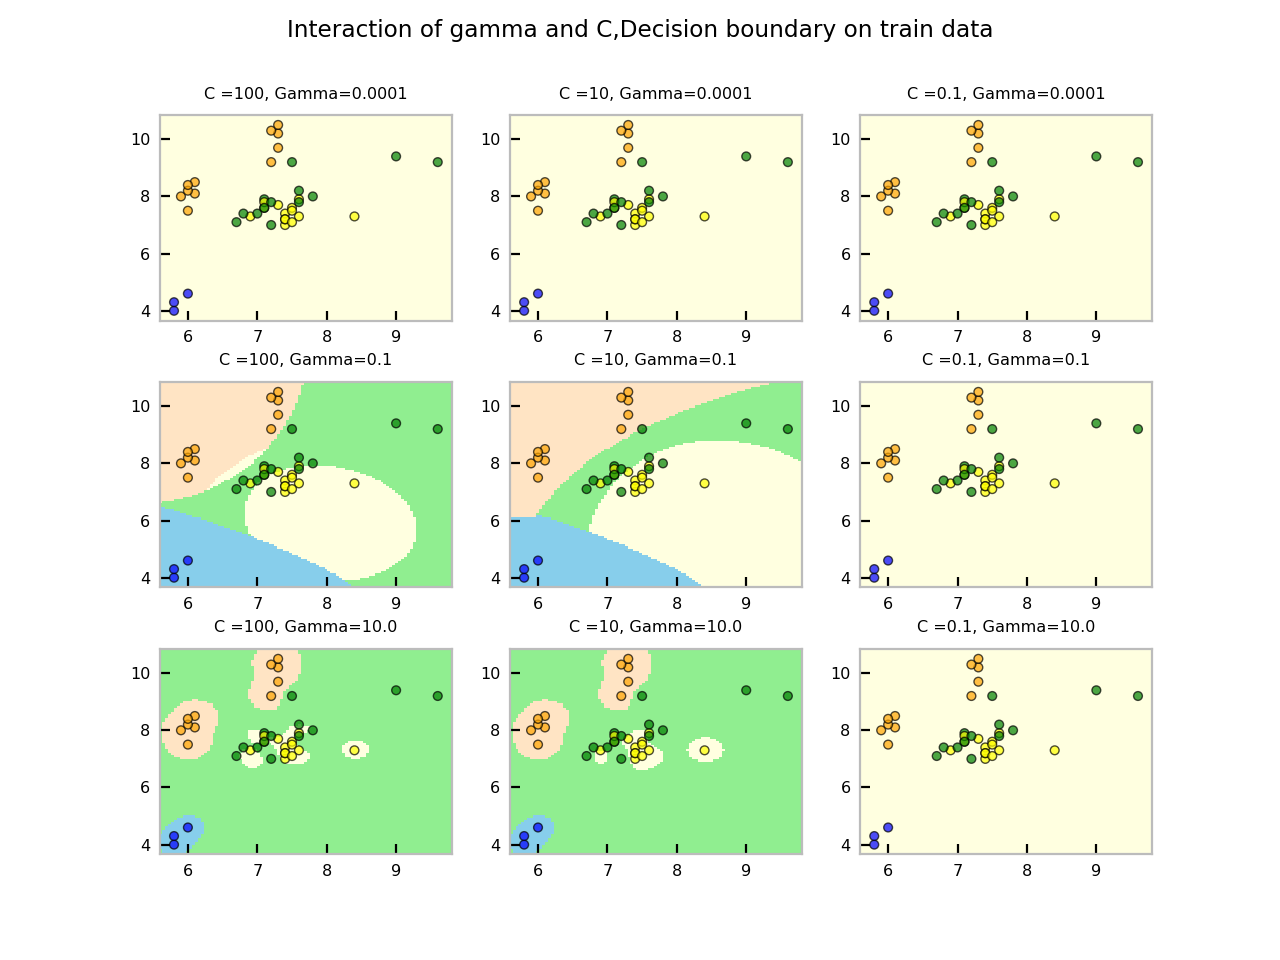

Text(0.5,0.98,'Interaction of gamma and C,Decision boundary on train data')

In [183]:
gamma = [10**(-4),10**(-1),10.0]
C = [100, 10, 0.1]
grid = [(g,c) for g in gamma for c in C]

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 22, shuffle = True)
plt.figure()
for i,(g,c) in enumerate(grid):
    stages = [('scale', StandardScaler()), ('clf', SVC(kernel = 'rbf', gamma = g, C = c))]
    pipe = Pipeline(stages)
    pipe.fit(X_train, Y_train)
    plt.subplot(3,3,i+1)
    plot_db(pipe, c, g, X_train, Y_train)
    plt.tick_params(axis = 'both', labelsize = 'xx-small')
    plt.subplots_adjust(hspace = 0.3)
plt.suptitle('Interaction of gamma and C,Decision boundary on train data', fontsize = 'small')

#### Observations
- From left to right, regularization increases, and top to bottom gamma increases (decision boundaries will
become complex) 
    1. High regularization or low gamma, cause underfitting 
        - In row 0, observe that gamma is constant and very low, i.e decision boundaries are very loose, regularization does not have any effect 
        - In col 2, Regularization is high, varying gamma does not change decision boundaries
    2. Low regularization and high gamma, causes overfitting 
       - In row 2 
    3. Clearly, C and gamma have an interaction effect.    

#### 3.5 Pros and Cons of SVMs
|Pros|Cons|
|:-|:-|
|Can fit varied complex high dimensional data efficiently by using kernels, found to be very effective on text and image problems|Performance degrades as number of training samples increases , ~50000 and become impractical to use|
|Can be robust to outliers, as the decision boundary only depends on support vectors|Does not provide prob. estimates where needed, although provision exist to estimate probability estimates like platt scaling|
|NA|Careful scaling of data required for accuracy, tuning of kernel and kernel parameters with regularization|
|NA|Hard to interpret why predictions were made|

#### Model complexity 
- controlled by params
 - kernel, kernel params, C